In [1]:
from pylab import *

In [2]:
def integra_h3(x,f):
#Welp, ya lei varias veces el pdf de la página, pero no logro entender
#del todo, veamos si leyendo el código logro sacarle más jugo al asunto
    mod_f , int_f , h = len(f)%2 , 0 , x[1]-x[0]
#bueno, mod_f se refiere a pues eso, su modulo
#modf_f = len(f)%2 es decir le sacamos modulo 2 a len(f) sencillo
#int_f = 0, creo que es solo eso, le dice que vale 0,
#por ultimo x[1]-x[0], intente sacar esto, pero ni de pedo
#solo sale cuando le das valores abajo, en si es una funcion lo que 
#tenemos aqui en este cuadro, por lo que supongo que es en caso de 
#que le metamos un array, y le digamos bebecita, se llama x 
    if mod_f == 0:
#esto solo va a ocurrir si el modulo de f es 0, eso significa == igual

        for i in range(2,len(f),2):
#Mira viejo cochino, el range es start,end, y step, eze como tu ama
            int_f += f[i+1] + 4*f[i] + f[i-1]
#lo que significa ahora, es que cada vez que hace un ciclo, el valor 
#de int_f es igual al previo mas el nuevo y asi
#lo que no entiendo ahora es la identación
        int_f = int_f/3
        int_f += (23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] - 3*f[4])/48
    else:
        for i in range(1,len(f),2):
            int_f += f[i+1] + 4*f[i] + f[i-1]
        int_f = int_f/3
    return int_f*h

#Pues este desamdre estaba al reves, este es el segundo caso
#que viene en la notas, pero me falta hacerle un poco mas de
#disección


Int de y = 2.0001095173150043


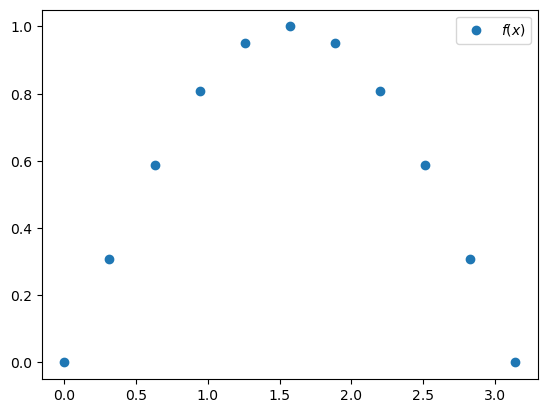

In [3]:
x = linspace(0,pi,11)
y = sin(x)
int_de_y = integra_h3(x,y)
print('Int de y =',int_de_y)
plot(x,y,'o',label='$f(x)$')
legend()
show()

#Lo obvio, unas gráficas para comparar la precisión del algortimo

In [4]:
def primitiva_v1(x,f):
    # Ojo esta funcion falta adaptarla a todos los puntos
    h = x[1]-x[0]
    F = zeros(len(f)-4)
    for i in range(1,len(F)):
        F[i] = F[i-1] + (23*f[i] + 26*f[i+1] - 4*f[i+2] + 6*f[i+3] - 3*f[i+4])
    return F*h/48


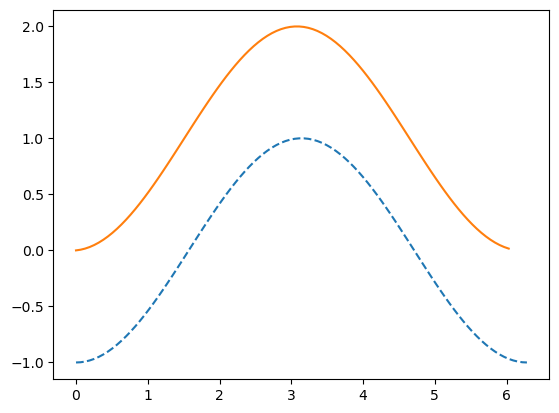

In [5]:
x = linspace(0,2*pi,100)

y = sin(x) #funcion
Y = -cos(x) #primitiva de la funcion analitica

prim_x = x[:-4]
prim_y = primitiva_v1(x,y)
plot(x,Y,'--')
plot(prim_x,prim_y)
show()

In [6]:
prim_y

array([0.        , 0.00603452, 0.01606327, 0.03004584, 0.04792595,
       0.06963159, 0.09507537, 0.12415483, 0.15675288, 0.19273825,
       0.23196606, 0.27427833, 0.3195047 , 0.36746305, 0.41796027,
       0.47079303, 0.52574859, 0.58260566, 0.6411353 , 0.70110183,
       0.76226378, 0.82437489, 0.88718504, 0.95044133, 1.01388905,
       1.0772727 , 1.14033708, 1.20282824, 1.26449455, 1.3250877 ,
       1.3843637 , 1.44208388, 1.49801581, 1.55193428, 1.60362217,
       1.65287136, 1.69948354, 1.743271  , 1.78405745, 1.82167865,
       1.8559831 , 1.88683268, 1.91410317, 1.93768476, 1.95748249,
       1.97341664, 1.98542306, 1.9934534 , 1.99747532, 1.99747262,
       1.99344533, 1.98540965, 1.97339795, 1.95745858, 1.93765573,
       1.91406915, 1.8867938 , 1.85593951, 1.82163052, 1.78400499,
       1.74321442, 1.69942305, 1.65280723, 1.60355464, 1.55186363,
       1.49794232, 1.44200784, 1.38428543, 1.3250075 , 1.26441275,
       1.20274517, 1.14025308, 1.07718811, 1.01380419, 0.95035

In [7]:
def primitiva_v2(x,f):
    # Ojo esta funcion falta adaptarla a todos los puntos
    N , h = len(f) , x[1]-x[0]
    if N%2 == 1:
        print('primer caso')
        N_cut = int( (N-1)/2 +1 )
        x_c , F = zeros(N_cut) , zeros(N_cut)
        for i in range(N_cut):
            x_c[i] = x[2*i]
        for i in range(N_cut-1):
            F[i+1] += F[i] + f[2*i+2] + 4*f[2*i+1] + f[2*i]
    else:
        print('segundo caso')
        N_cut = int(N/2 +1)
        x_c , F = zeros(N_cut) , zeros(N_cut)
        x_c[0] , x_c[1] = x[0] , x[1]
        for i in range(1,N_cut-1):
            x_c[i+1] = x[2*i+1]
        F[1] = (23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] - 3*f[4])*0.0625
        for i in range(1,N_cut-1):
            F[i+1] += F[i] + f[2*i+1] + 4*f[2*i] + f[2*i-1]
    return x_c , F*h/3

primer caso


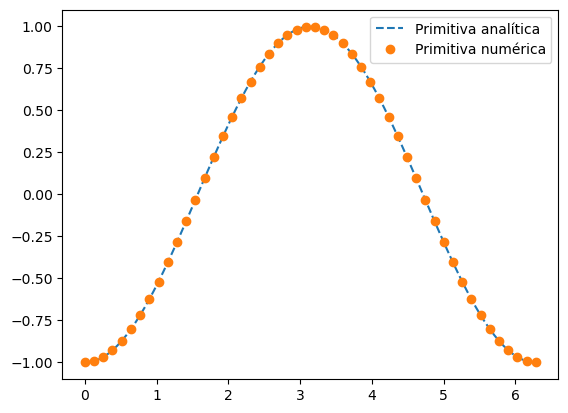

In [10]:
x = linspace(0,2*pi,99)
y = sin(x)
Y = -cos(x)
x_c , prim_y = primitiva_v2(x,y)
plot(x,Y,'--',label='Primitiva analítica')
plot(x_c , prim_y-1,'o',label='Primitiva numérica')
legend()
show()

In [11]:
x_c

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [ ]:
x = linspace(0,2*pi,100)
y = sin(x)
Y = -cos(x)
x_c , prim_y = primitiva_v2(x,y)
plot(x,Y,'--',label='Primitiva analítica')
plot(x_c , prim_y-1,label='Primitiva numérica')
show()